#### Exercici 1

Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Obrim el dataset i mirem les primeres files amb el mètode head()

In [3]:
df = pd.read_csv('DelayedFlights.csv')    
pd.set_option('display.max_columns', None) # per veure totes les columnes 
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Veiem que hi han varies columnes que fan referència al temps de retràs, en aquest aspecte per aquest exercici agafaré per medir el retràs la columna 'ArrDelay' que fa referència a l'endarreriment del vol en arribar al destí.

De les altres columnes agafaré DayOfWeek, Month, UniqueCarrier, AirTime, Distance, Origin i Destination. Vull veure si amb aquesta informació podem treure alguna relació amb el temps de retràs, no vol dir que les columnes restants no siguin importants o puguin contenir informació útil.

Veiem el nom de totes les columnes per seleccionar les que ens interessen:

In [4]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [5]:
# creem una copia del dataframe amb les columnes que hem selecionat: 
delayed = df[['Month', 'DayOfWeek', 'UniqueCarrier', 'AirTime','ArrDelay', 'Origin', 'Dest', 'Distance']].copy()
delayed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Month          int64  
 1   DayOfWeek      int64  
 2   UniqueCarrier  object 
 3   AirTime        float64
 4   ArrDelay       float64
 5   Origin         object 
 6   Dest           object 
 7   Distance       int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 118.2+ MB


El nou dataframe té ara 9 columnes i 1936758 files. 

#### Exercici 2

Fes un informe complet del data set:.

+ Resumeix estadísticament les columnes d’interès
+ Troba quantes dades faltants hi ha per columna
+ Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)
+ Taula de les aerolínies amb més endarreriments acumulats
+ Quins són els vols més llargs? I els més endarrerits?
+ Etc.

Primer mirem les **dades faltants** que hi ha per columna: 

In [6]:
delayed.isnull().sum()

Month               0
DayOfWeek           0
UniqueCarrier       0
AirTime          8387
ArrDelay         8387
Origin              0
Dest                0
Distance            0
dtype: int64

Podem observar que a la columna AirTime i a la columna ArrDelay hi ha 8387 dades que falten. Tenint en compte que es tracta d'un percentatge molt petit respecte a les dades totals eliminarem aquestes files.

In [7]:
delayed.dropna(inplace=True) # fem servir inplace = True per actualitzar el nostre dataframe
delayed.shape

(1928371, 8)

Veiem que s´han eliminat del dataframe 8387 files que contenien dades faltants. 

#### Resum estadístic de les columnes amb variables numèriques

Ara mirarem un resum estadístic de les columnes amb dades numèriques : AirTime, ArrDelay y Distance. 

In [8]:
# fem servir un mètode per evitar que els resultats surtin en forma exponencial
delayed[['AirTime','ArrDelay', 'Distance']].describe().apply(lambda s: s.apply('{0:.5f}'.format)) 

,AirTime,ArrDelay,Distance
count,1928371.00000,1928371.00000,1928371.00000
mean,108.27715,42.19988,764.94860
std,68.64261,56.78472,573.88577
min,0.00000,-109.00000,11.00000
25%,58.00000,9.00000,338.00000
50%,90.00000,24.00000,606.00000
75%,137.00000,56.00000,997.00000
max,1091.00000,2461.00000,4962.00000


La columna AirTime conté valors on el temps de vol és igual a zero. Entenem que aixó es erroni, eliminarem les files on el resultat es zero ja que si no ens donarà error posteriorment quan calculem la velocitat del vol (haurem de dividir la 'Distance' entre 'AirTime').

In [9]:
# fem servir el mètode drop per eliminar les files on 'AirTime' sigui 0
delayed.drop(delayed[delayed['AirTime'] == 0].index, inplace= True)
delayed[['AirTime','ArrDelay', 'Distance']].describe().apply(lambda s: s.apply('{0:.5f}'.format)) 

,AirTime,ArrDelay,Distance
count,1928364.00000,1928364.00000,1928364.00000
mean,108.27754,42.19976,764.94962
std,68.64242,56.78466,573.88610
min,1.00000,-109.00000,11.00000
25%,58.00000,9.00000,338.00000
50%,90.00000,24.00000,606.00000
75%,137.00000,56.00000,997.00000
max,1091.00000,2461.00000,4962.00000


Veiem que s'han eliminat 7 files en total. Podem fer un breu resum de les dades: 

* **AirTime**: Ens diu que el temps mitjá de vol son 108 minuts. La desviació estandar és relativament baixa (més baixa que el valor mitjà), aixó vol dir que les dades no són molt disperses. El 50 % dels vols té una duració  de menys de 90 minuts. Hauríem d'investigar més a fons els valors mínim i màxim per veure si hi han errors en les dades, ja que el temps de vol més baix és 1 minut i el més alt son 18 hores.

* **Distance**: En aquest cas veiem que la distància mitjana és de 764 milles i que el 75 % de vols recorren una distància inferior a 997 milles, sembla que les dades són bastant concentrades en aquest cas.

Si agafem la columna 'Distance' podem veure **els vols més llargs**, ordenant la columna en ordre descendent mirarem quines són les distàncies més grans

In [10]:
longest_flights = delayed.sort_values(by= ['Distance'], ascending = False)
longest_flights[:10] # mirarem els 10 primers vols

,Month,DayOfWeek,UniqueCarrier,AirTime,ArrDelay,Origin,Dest,Distance
718764,4,3,CO,565.0,45.0,HNL,EWR,4962
1724446,11,7,CO,616.0,62.0,EWR,HNL,4962
1618877,10,2,CO,607.0,-10.0,EWR,HNL,4962
556372,3,3,CO,641.0,21.0,EWR,HNL,4962
1519995,9,4,CO,586.0,15.0,EWR,HNL,4962
1518539,9,4,CO,603.0,27.0,EWR,HNL,4962
1252164,7,7,CO,588.0,15.0,EWR,HNL,4962
1519874,9,6,CO,603.0,-7.0,EWR,HNL,4962
870898,5,4,CO,589.0,-4.0,EWR,HNL,4962
556373,3,4,CO,634.0,92.0,EWR,HNL,4962


Els vols més llargs són els que van de HNL a EWR (de Honolulu a Newark).

Amb les columnes 'AirTime' i 'Distance' podem afegir una columna que ens digui la **velocitat mitjana del vol** en milles per hora, l'anomenarem 'FlightSpeed'. Podem fer:

In [11]:
delayed['FlightSpeed'] = (delayed['Distance'] / delayed['AirTime']) *60 
delayed.head()

,Month,DayOfWeek,UniqueCarrier,AirTime,ArrDelay,Origin,Dest,Distance,FlightSpeed
0,1,4,WN,116.0,-14.0,IAD,TPA,810,418.965517
1,1,4,WN,113.0,2.0,IAD,TPA,810,430.088496
2,1,4,WN,76.0,14.0,IND,BWI,515,406.578947
3,1,4,WN,77.0,34.0,IND,BWI,515,401.298701
4,1,4,WN,87.0,11.0,IND,JAX,688,474.482759


Ara ja podem calcular la velocitat mitjana de tots els vols: 

In [12]:
delayed['FlightSpeed'].mean()

396.95266736489657

Ens diu que la **velocitat mitjana dels vols és de 396,95 milles per hora**. 

* **ArrDelay**: En el temps de retràs en l'arribada podem dir que el temps mitjà és de 42 minuts, pero veiem que aquí la desviació stándar és molt alta (56,78 minuts, més alta que el valor mitjà). Això ens pot dur a pensar que les dades estan molt disperses, encara que veiem que el 50% de vols té un retràs inferior a 24 minuts, aixó es molt per sota de la mitja. Es posible que al poder tenir **valors negatius** (vols que arriben amb antelació) tingui efecte a la baixa en la mitja pero en realitat hi hagi molts vols amb retràs elevat. Investigarem una mica més aquesta dada. 

Crearem una nova columna que anomenarem 'DelayInterval' amb els intervals de retràs per poder representar aquesta informació visualment. Definirem quatre franjes de temps de retràs: 

* Menys de 15 minuts
* Entre 15 i 30 minuts 
* Entre 30 i 60 minuts 
* 60 o més minuts

In [13]:
# definim una funció que farem servir per crear la nova columna amb el mètode apply()
def delay_interval(x): 
    if x < 15: 
        return "Less than 15"
    elif x < 30: 
        return "Between 15 and 30"
    elif x < 60: 
        return "Between 30 and 60"
    else: 
        return "More than 60"

delayed['DelayInterval'] = delayed['ArrDelay'].apply(delay_interval)
delayed.head()

,Month,DayOfWeek,UniqueCarrier,AirTime,ArrDelay,Origin,Dest,Distance,FlightSpeed,DelayInterval
0,1,4,WN,116.0,-14.0,IAD,TPA,810,418.965517,Less than 15
1,1,4,WN,113.0,2.0,IAD,TPA,810,430.088496,Less than 15
2,1,4,WN,76.0,14.0,IND,BWI,515,406.578947,Less than 15
3,1,4,WN,77.0,34.0,IND,BWI,515,401.298701,Between 30 and 60
4,1,4,WN,87.0,11.0,IND,JAX,688,474.482759,Less than 15


Veiem que ara tenim una nova columna, la representarem amb un pie chart a veure si podem treure alguna conclusió. Primer contarem les vegades que es repeteix cada interval: 

In [14]:
delayed['DelayInterval'].value_counts()

Less than 15         680881
More than 60         447824
Between 30 and 60    403197
Between 15 and 30    396462
Name: DelayInterval, dtype: int64

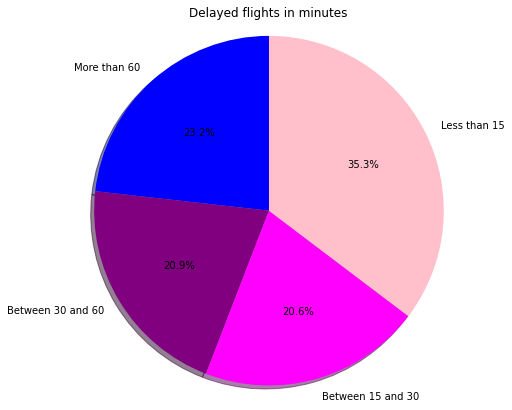

In [15]:
# fem un pie chart, ho faig d'aquesta manera per poder escollir l'ordre dels slices: 
labels = "More than 60", "Between 30 and 60","Between 15 and 30", "Less than 15"
sizes = [447824, 403197, 396462,680881]
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow= True, startangle=90, colors= ('blue', 'purple','magenta','pink'))
ax1.axis('equal')
plt.title('Delayed flights in minutes')
plt.show()


Podem veure que quasi la meitat dels vols (44%) tenen un retràs de 30 minuts o més, aixó explicaria que la desviació estàndar sigui tan alta, hi han molts vols on el retras és petit (menys de 15 minuts), peró també hi ha molts on el retràs és molt elevat (el 23,2 % amb més de 60 minuts!!)

Adjuntem una gràfica on veiem la **distribució dels temps de retràs del vol mesurats en l'arribada.** 

<img src="plot2.png" width="800" height="400">

Veiem que del total de vols, hi han **204956 vols que han arribat a temps** (temps de retard en destí igual o més petit que zero.)

Si volguèssim veure la **relació entre el retràs del vol en la sortida i en l'arribada**  ho podem veure amb un scatterplot, podem observar que els dos temps de retràs estan clarament relacionats. 

<img src="plot4.png" width="800" height="400">

També podem fer un gràfic de **boxplots on apareguin els temps de retràs en la sortida i en l'arribada del vol per cada companyia:**

<img src="plot5.png" width="800" height="400">

Podem intentar explicar aquests retards, anem veure si tenen alguna relació amb la distància o amb el temps de vol, farem un càlcul de correlació entre aquestes variables: 

In [16]:
delayed[['AirTime','ArrDelay', 'Distance']].corr()

,AirTime,ArrDelay,Distance
AirTime,1.000000,-0.000185,0.980297
ArrDelay,-0.000185,1.000000,-0.029853
Distance,0.980297,-0.029853,1.000000


Veiem que **no hi ha cap correlació entre els retards en l'arribada dels vols i la distància del vol o el temps de vol** (0% en el cas de 'Airtime' i -2,9 % en el cas de 'Distance'). Haurem de seguir investigant en aquest sentit. 

Evidentment podem veure que la correlació entre temps de vol i distància de vol es molt alta (del 98%). 

Per conèixer quins són els **vols més endarrerits**, els podem ordenar en sentit descendent a partir de la columna 'ArrDelay'. Comprobarem els 10 vols que tenen més retràs: 

In [17]:
most_delayed_flights = delayed.sort_values(by=['ArrDelay'], ascending= False)
most_delayed_flights[:10]

,Month,DayOfWeek,UniqueCarrier,AirTime,ArrDelay,Origin,Dest,Distance,FlightSpeed,DelayInterval
322516,2,7,NW,437.0,2461.0,HNL,MSP,3972,545.354691,More than 60
686014,4,4,NW,132.0,2453.0,CLT,MSP,930,422.727273,More than 60
839306,5,2,NW,145.0,1951.0,RSW,DTW,1085,448.965517,More than 60
1009553,6,5,MQ,50.0,1707.0,LIT,DFW,304,364.800000,More than 60
1881639,12,5,NW,192.0,1655.0,BOS,MSP,1124,351.250000,More than 60
1497823,9,1,NW,75.0,1583.0,OMA,MSP,282,225.600000,More than 60
685437,4,7,NW,63.0,1542.0,MOT,MSP,449,427.619048,More than 60
163379,1,6,AA,207.0,1525.0,EGE,MIA,1811,524.927536,More than 60
1214839,7,3,NW,160.0,1510.0,SEA,MSP,1399,524.625000,More than 60
521096,3,5,NW,47.0,1490.0,BNA,MEM,200,255.319149,More than 60


#### Resum de les dades categòriques

* **Columna 'UniqueCarrier'**

Mirarem la columna 'UniqueCarrier' que ens diu la companyia que opera cada vol. Ens interessaria saber el **temps de enraderimient mitjà per companyia** per veure si hi han moltes diferències entre les companyies. Podem fer: 

In [18]:
carriers_mean_delay = delayed.groupby('UniqueCarrier')['ArrDelay'].mean().sort_values(ascending = False)
carriers_mean_delay

UniqueCarrier
YV    55.287049
B6    55.088739
OH    51.016968
XE    50.181471
UA    47.784399
EV    47.554255
9E    46.936493
AA    46.561553
OO    45.368768
MQ    45.295058
NW    43.911000
FL    43.683157
CO    40.568449
DL    39.881507
US    36.445019
AS    36.060882
HA    34.209449
WN    30.087884
F9    27.938953
AQ    21.255376
Name: ArrDelay, dtype: float64

Podem fer un gràfic de **boxplot amb els retards a l'arribada per companyia on hem inclós també el temps mitjà de retràs:** 

<img src="plot3.png" width="800" height="400">

Efectivament veiem que hi han moltes diferències en el temps mitjà de retràs segons la companyia (més del doble de temps entre la primera i la última, per exemple ). 

Si volem fer una **comparació entre diferents variables numèriques** (per exemple, temps de retràs en sortida, temps de retard en l'arribada i temps total de duració del vol) **segons cada companyia** ho podem representar amb un ridgeline plot: 

<img src="plot6.png" width="800" height="400">

Ara farem una taula per veure les **5 companyies que tenen més endarreriments acumulats:**  

In [19]:
# fem la suma dels minuts acumulats per companyia fent servir el mètode groupby i després ho ordenem amb sort_values()

carriers_cumulative_delay = delayed.groupby('UniqueCarrier')['ArrDelay'].aggregate(sum) 
carriers_cumulative_delay.sort_values(ascending = False)[:5] 

UniqueCarrier
WN    11319092.0
AA     8889066.0
UA     6733013.0
MQ     6396704.0
OO     5978424.0
Name: ArrDelay, dtype: float64

Aquí també veiem moltes difrències entre companyies, però em de tenir en compte que en aquest cas estem comparant les companyies sense tenir en compte el nombre de vols que opera cadascuna, estem mirant dades absolutes. Es útil per veure quina compayia acumula més minuts de retràs (seria WN). 

Adjuntem un gràfic on veiem els **vols que ha realitzat cada companyia.**

<img src="plot1.png" width="800" height="400">

* **Columna 'DayOfWeek'**

Si mirem el calendari sabem que el dia 1 és refereix a dilluns i el 7 a diumenge. Ara mirarem vols per dia de la setmana a veure si ens donen alguna informació.

In [20]:
flights_per_day = delayed['DayOfWeek'].value_counts().sort_values(ascending = False)
flights_per_day

5    321982
1    289821
4    288344
7    284939
3    261497
2    259581
6    222200
Name: DayOfWeek, dtype: int64

Veiem que el dia 5 (divendres) és quan hi han més vols i el dissabte quan menys, podem mirar ara el **temps mitjà de retràs segons el dia de la setmana:**

In [21]:
mean_delays_per_dayofweek = delayed.groupby('DayOfWeek')['ArrDelay'].mean().sort_values(ascending = False)
mean_delays_per_dayofweek

DayOfWeek
7    44.697205
2    43.806114
5    43.493618
1    41.731417
4    41.071599
3    40.438338
6    39.393474
Name: ArrDelay, dtype: float64

El diumenge es el dia que té mès retrasos, pero veiem que les dades són bastant centrades, no es troben gaires diferències i el valor mitjà és semblant en tots els dies.

* **Columna 'Month':**

Anem a fer el mateix segons el mes del vol a veure si treiem més informació. Calcularem els minuts mitjans de retràs per vol segons el mes de l'any: 

In [22]:
mean_delays_per_month = delayed.groupby('Month')['ArrDelay'].mean()
mean_delays_per_month

Month
1     42.800747
2     45.005392
3     41.914584
4     38.835305
5     37.593999
6     46.532728
7     45.995136
8     41.434409
9     35.168126
10    31.385769
11    37.705510
12    49.481435
Name: ArrDelay, dtype: float64

Aquí veiem que la mitjana varia bastant segons el mes de l'any, potser si que hi ha alguna relació entre el mes i els temps de retràs en els vols. Podem posar-ho en un gràfic per veure-ho millor:

<AxesSubplot:title={'center':'Average delay in minutes per month'}, xlabel='Month'>

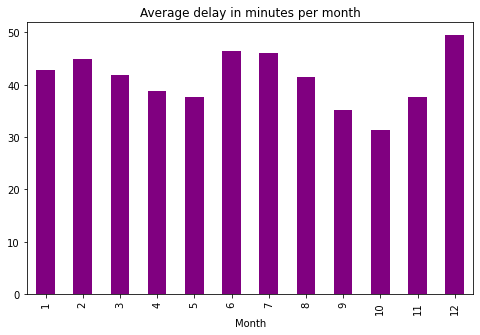

In [23]:
mean_delays_per_month.plot(kind= 'bar', figsize= (8,5), color='purple', title="Average delay in minutes per month")

Sembla que hi ha una estacionalitat en el temps mitjà de retras, potser concideix amb el nombre de vols, anem a comprobar-ho. Mirarem primer el nombre de vols per mes: 

In [24]:
flights_per_month = delayed['Month'].value_counts().sort_index()
flights_per_month

1     182913
2     188624
3     200114
4     154783
5     152709
6     199888
7     182171
8     161974
9      95351
10    103181
11    105148
12    201508
Name: Month, dtype: int64

Ho possarem en un gràfic també per poder-ho comparar amb el gràfic anterior:

<AxesSubplot:title={'center':'Flights per month'}>

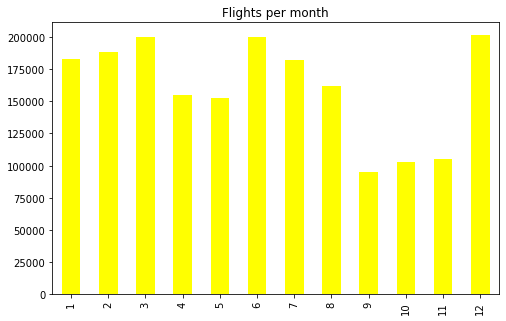

In [25]:
flights_per_month.plot(kind='bar', figsize= (8,5), color='yellow', title= 'Flights per month')

Veiem que la forma dels dos grafics és la mateixa, segueix la mateixa tendència. Sembla que els periodes on el nombre de vols es més alt coincideix amb els periodes on el temps mitja de retràs puja. Podem medir la **correlació entre el nombre de vols i la mitjana de endarreriments per mes:**

In [26]:
correlation = mean_delays_per_month.corr(flights_per_month)
correlation

0.8843764546936563

Ens dona una **correlació positiva de 0.8843 (88,4 %)**. És una correlació molt alta. Aixó ens diu que el nombre de vols afecta de manera directa en el temps de retras, els periodes en els quals puja el nombre de vols també puja el temps mitjà de endarreriment.

**CONCLUSIONS**: Segons les dades que hem analitzat sembla que el temps d'endarreriments depen principalment de dos factors: 
+ La companyia que opera el vol.
* El nombre de vols del periode. 

#### Exercici 3

Exporta el data set net i amb les noves columnes a Excel.

Em dona error en fer-ho d'un cop així que ho dividirem en 4 parts, ja que em dona error al pujar-ho a GitHub si no.

In [27]:
final_delayed_part1 = delayed[:500000].copy()
final_delayed_part2 = delayed[500000:1000000].copy()
final_delayed_part3 = delayed[1000000:1500000].copy()
final_delayed_part4 = delayed[1500000:].copy()

In [28]:
# farem servir el mètode to_excel()
#final_delayed_part1.to_excel('final_delayed_part1.xlsx', index = False)
#final_delayed_part2.to_excel('final_delayed_part2.xlsx', index = False)
#final_delayed_part3.to_excel('final_delayed_part3.xlsx', index = False)
#final_delayed_part4.to_excel('final_delayed_part4.xlsx', index = False)